<a href="https://colab.research.google.com/github/KotagiriRohan/Titanic_Machine_Learning/blob/main/Titanic_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pwd

/content


In [94]:
import pandas as pd
import numpy as np
train_path = "/content/Dataset/titanic_train.csv"
test_path  = "/content/Dataset/titanic_test.csv"
df = pd.read_csv(train_path, index_col="PassengerId")
df_test = pd.read_csv(test_path,index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
#removing irrelavent columns and columns with high null values.
X = df.drop(["Name","Ticket","Cabin"],axis=1)
X_test = df_test.drop(["Name","Ticket","Cabin"],axis=1)
y= X.pop("Survived")
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S


In [96]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [97]:
#converting catagorical variables
for col in X.select_dtypes(['object']):
  X[col], _ = X[col].factorize()
for col in X_test.select_dtypes(['object']):
  X_test[col], _ = X_test[col].factorize()
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.0,1,0,7.2500,0
2,1,1,38.0,1,0,71.2833,1
3,3,1,26.0,0,0,7.9250,0
4,1,1,35.0,1,0,53.1000,0
5,3,0,35.0,0,0,8.0500,0


In [98]:
#splitting the data set into train and validation set
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state=0)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
106,3,0,28.0,0,0,7.8958,0
69,3,1,17.0,4,2,7.9250,0
254,3,0,30.0,1,0,16.1000,0
321,3,0,22.0,0,0,7.2500,0
707,2,1,45.0,0,0,13.5000,0


In [99]:
y_train.head()

PassengerId
106    0
69     1
254    0
321    0
707    1
Name: Survived, dtype: int64

In [100]:
from sklearn.impute import SimpleImputer
#replacing null values from the data set wiht the most frequent number
my_imputer = SimpleImputer(missing_values=np.nan,strategy = 'most_frequent')
X_impu_train = pd.DataFrame(my_imputer.fit_transform(X_train))
X_impu_train.columns = X_train.columns
X_impu_train.index = X_train.index
X_impu_valid = pd.DataFrame(my_imputer.transform(X_valid))
X_impu_valid.columns = X_valid.columns
X_impu_valid.index = X_valid.index
X_impu_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
106,3.0,0.0,28.0,0.0,0.0,7.8958,0.0
69,3.0,1.0,17.0,4.0,2.0,7.9250,0.0
254,3.0,0.0,30.0,1.0,0.0,16.1000,0.0
321,3.0,0.0,22.0,0.0,0.0,7.2500,0.0
707,2.0,1.0,45.0,0.0,0.0,13.5000,0.0


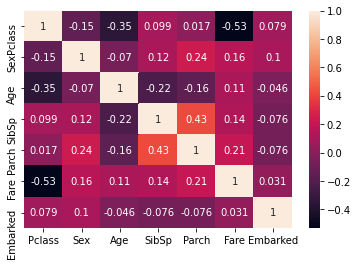

In [101]:
# now checking the relationship between the survived and the fair they paid and their Pclass

import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns

sns.heatmap(data = X_impu_train.corr(),annot= True)

# from the graph we can see that higher class female had higher chance of survival

In [102]:
# using Logistic Regression to determine the outcome
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)

classifier.fit(X_impu_train,y_train)
y_pred = classifier.predict(X_impu_valid)

In [103]:
from sklearn.metrics import mean_absolute_error
mean = mean_absolute_error(y_valid,y_pred) 
mean

0.15695067264573992

In [107]:
test_imputer  = SimpleImputer(missing_values=np.nan,strategy = 'most_frequent')
X_fin = pd.DataFrame(test_imputer.fit_transform(X))
X_fin.columns =  X.columns
X_fin.index = X.index

X_fin_test = pd.DataFrame(test_imputer.transform(X_test))
X_fin_test.columns =  X_test.columns
X_fin_test.index = X_test.index
X_fin_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3.0,0.0,34.5,0.0,0.0,7.8292,0.0
893,3.0,1.0,47.0,1.0,0.0,7.0000,1.0
894,2.0,0.0,62.0,0.0,0.0,9.6875,0.0
895,3.0,0.0,27.0,0.0,0.0,8.6625,1.0
896,3.0,1.0,22.0,1.0,1.0,12.2875,1.0


In [116]:
fin_classifer = RandomForestClassifier(random_state=0)

fin_classifer.fit(X_fin,y)
y_test_pred = pd.DataFrame(fin_classifer.predict(X_fin_test))
y_test_pred.index = X_fin_test.index
y_test_pred.columns = ["Survived"]
y_test_pred.reset_index(inplace = True)
y_test_pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0


In [117]:
y_test_pred.to_csv("submission.csv",index=False)